In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from utils import get_train_test_loaders, CustomVGG, train, evaluate

## Parameters

In [3]:
data_folder = "data/cortica"
input_size = (224, 224)
batch_size = 10
lr = 0.0001
epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data

In [4]:
train_loader, test_loader = get_train_test_loaders(
    root=data_folder,
    batch_size=batch_size,
    img_size=input_size,
    test_size=0.2,
    random_state=42,
)

# Model Training

In [5]:
model = CustomVGG(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [6]:
model = train(train_loader, model, optimizer, criterion, epochs, device)

Epoch 1/10: 

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Loss = 0.3559, Accuracy = 0.8667
Epoch 2/10: Loss = 0.2874, Accuracy = 0.9000
Epoch 3/10: Loss = 0.2362, Accuracy = 0.9000
Epoch 4/10: Loss = 0.1875, Accuracy = 0.9292
Epoch 5/10: Loss = 0.1267, Accuracy = 0.9625
Epoch 6/10: Loss = 0.1315, Accuracy = 0.9542
Epoch 7/10: Loss = 0.0536, Accuracy = 0.9833
Epoch 8/10: Loss = 0.0244, Accuracy = 0.9958
Epoch 9/10: Loss = 0.0222, Accuracy = 0.9958
Epoch 10/10: Loss = 0.0155, Accuracy = 1.0000


In [7]:
model_path = "model.h5"
torch.save(model, model_path)
# model = torch.load(model_path)

# Evaluation

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


Accuracy: 0.9508
Balanced Accuracy: 0.7500



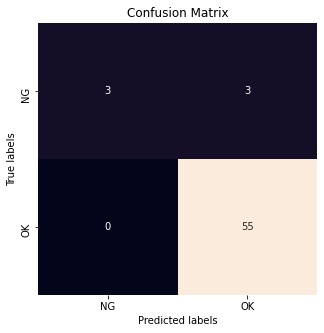

In [8]:
evaluate(model, test_loader, device)

# Visualization

In [17]:
from torchvision import transforms

In [89]:
def predict_localize(model, dataloader, device, n_samples=9):
    model.to(device)
    model.eval()

    class_names = dataloader.dataset.classes
    transform_to_PIL = transforms.ToPILImage()

    n_cols = 3
    n_rows = int(np.ceil(n_samples / n_cols))
    plt.figure(figsize=[n_cols * 5, n_rows * 5])

    counter = 0
    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        out = model(inputs)
        probs, class_preds = torch.max(out[0], dim=-1)
        feature_maps = out[1]

        for img_i in range(inputs.size(0)):
            img = transform_to_PIL(inputs[img_i])
            class_pred = class_preds[img_i]
            prob = probs[img_i]
            label = labels[img_i]
            feature_map0 = feature_maps[img_i][0].cpu().detach()

            counter += 1
            plt.subplot(n_rows, n_cols, counter)
            plt.imshow(img)
            plt.axis("off")
            plt.title(
                "Predicted: {}, Prob: {:.3f}, True Label: {}".format(
                    class_names[class_pred], prob, class_names[label]
                )
            )

            if class_pred == 0:
                plt.imshow(feature_map0 > 15, alpha=0.3, cmap="Reds")

            if counter == n_samples:
                plt.tight_layout()
                plt.show()
                return

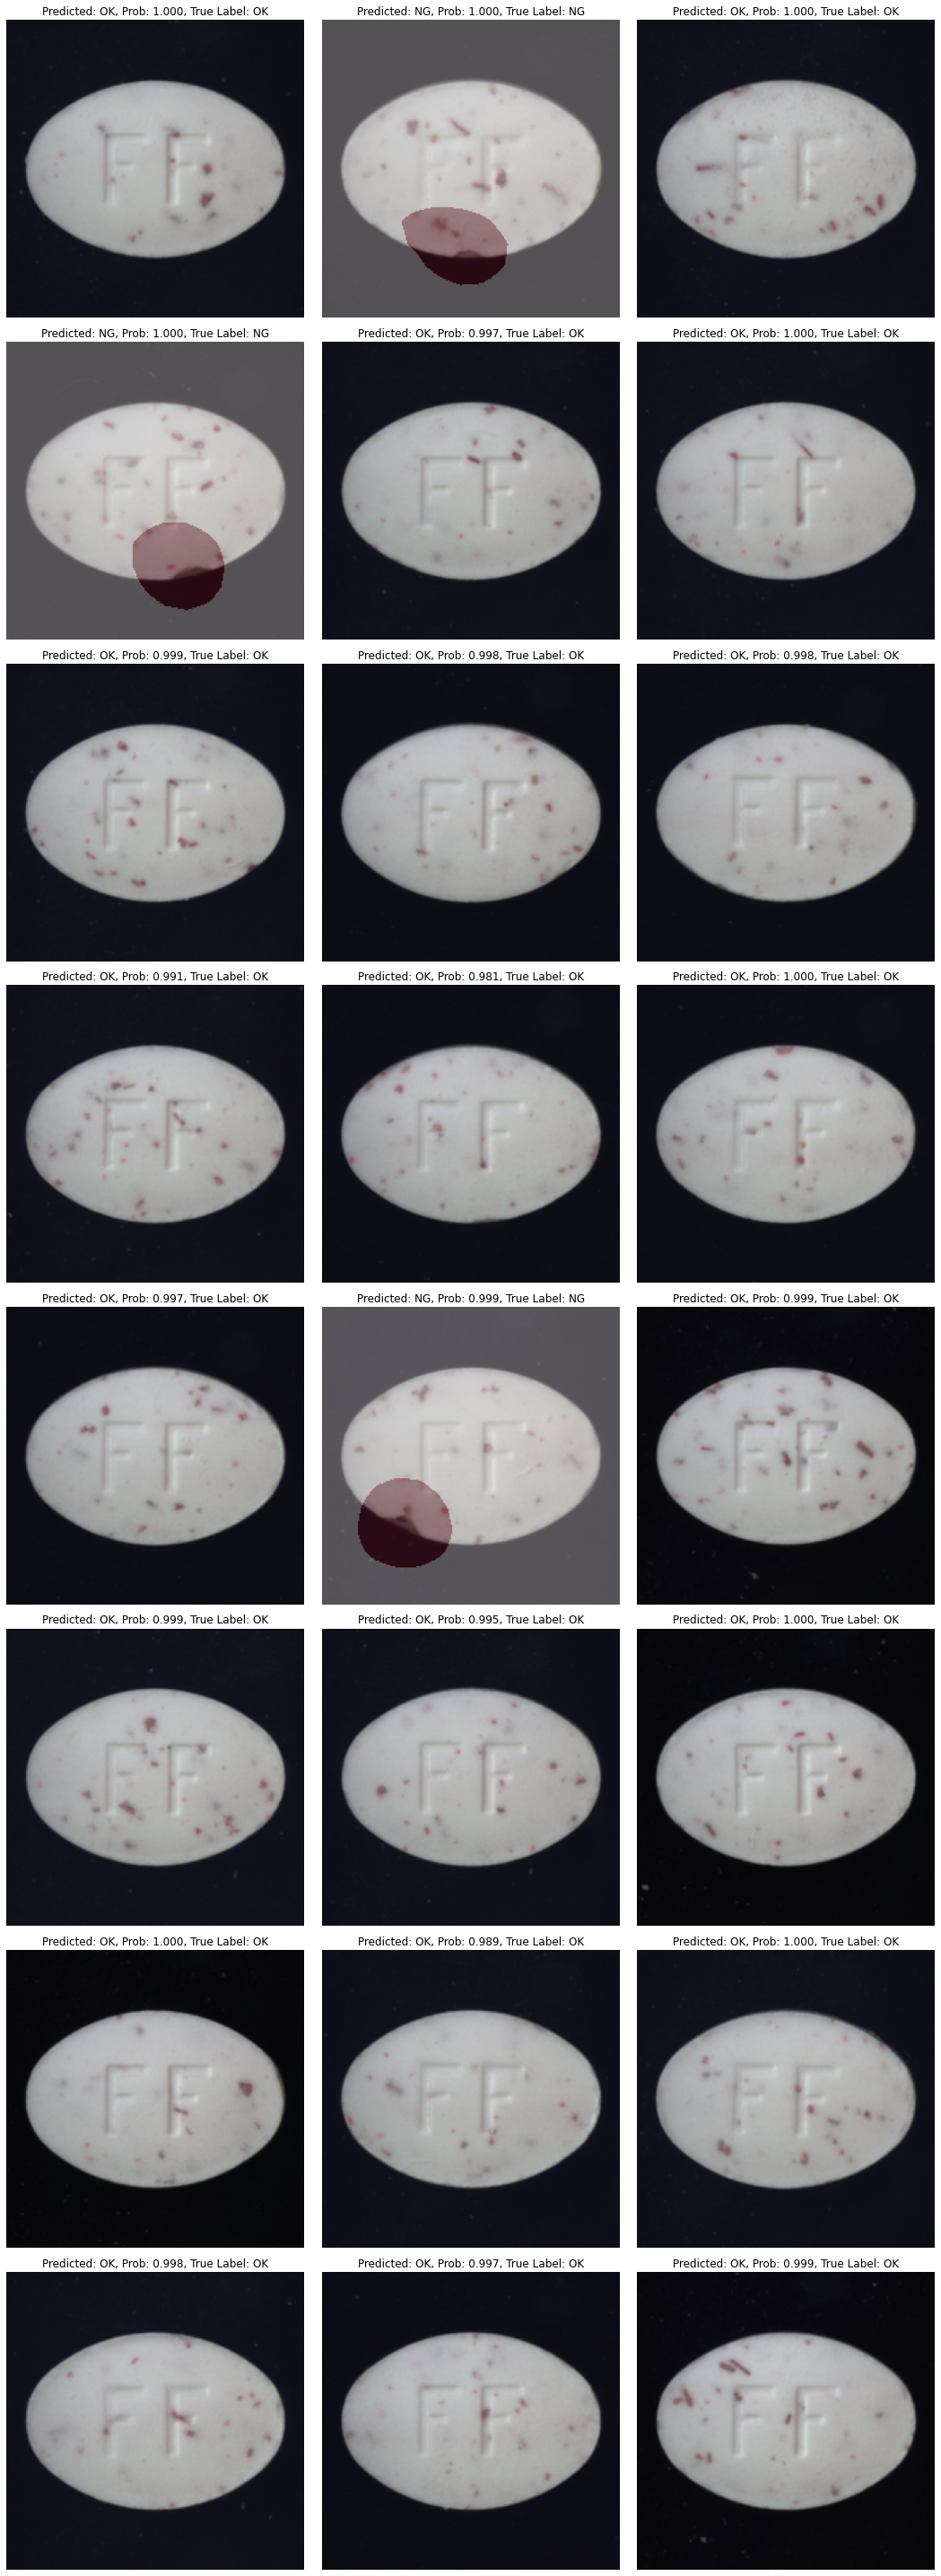

In [92]:
predict_localize(model, train_loader, device, n_samples=24)

In [ ]:
draw = ImageDraw.Draw(source_img)
draw.rectangle(((0, 00), (100, 100)), fill="black")

In [93]:
model.eval()

for inputs, labels in test_loader:
    inputs = inputs.to(device)
    out = model(inputs)
    probs, class_preds = torch.max(out[0], dim=-1)
    feature_maps = out[1]
    break

In [94]:
labels

tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [88]:
feature_map0.max()

tensor(6.5551)

In [46]:
class_names

['NG', 'OK']

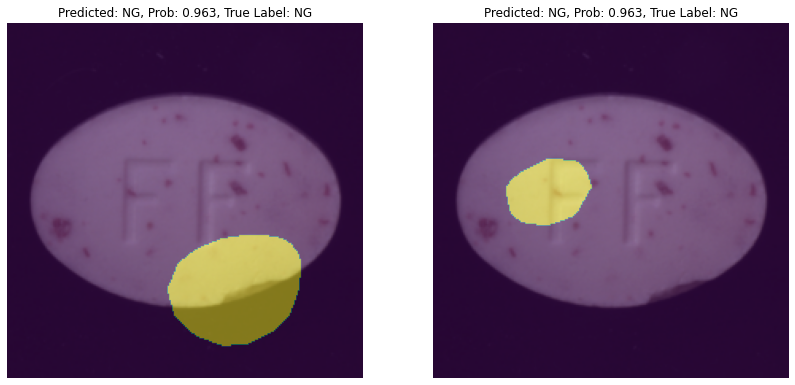

In [95]:
class_names = test_loader.dataset.classes
transform_to_PIL = transforms.ToPILImage()

img_i = 4
img = transform_to_PIL(inputs[img_i])
class_pred = class_preds[img_i]
prob = probs[img_i]
label = labels[img_i]
feature_map0 = feature_maps[img_i][0].cpu().detach()
feature_map1 = feature_maps[img_i][1].cpu().detach()


plt.figure(figsize=[14, 7])

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis("off")
plt.title(
    "Predicted: {}, Prob: {:.3f}, True Label: {}".format(
        class_names[class_pred], prob, class_names[label]
    )
)
plt.imshow(feature_map0 > 10, alpha=0.5)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis("off")
plt.title(
    "Predicted: {}, Prob: {:.3f}, True Label: {}".format(
        class_names[class_pred], prob, class_names[label]
    )
)
plt.imshow(feature_map1 > 10, alpha=0.5)

plt.show()

In [99]:
thres = 15
np.argmax(feature_map0 > thres, dim=0)

TypeError: _argmax_dispatcher() got an unexpected keyword argument 'dim'

In [108]:
thres

np_arr = feature_map0.cpu().detach().numpy()
np_arr > thres

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [111]:
np_arr = np.float32(np_arr > thres)

In [146]:
def get_bbox_from_heatmap(heatmap, thres):
    binary_map = heatmap > thres

    x_dim = np.max(heatmap, axis=0) * np.arange(0, heatmap.shape[1])
    x_0 = int(x_dim[x_dim > 0].min())
    x_1 = int(x_dim.max())

    y_dim = np.max(heatmap, axis=1) * np.arange(0, heatmap.shape[0])
    y_0 = int(y_dim[y_dim > 0].min())
    y_1 = int(y_dim.max())

    return x_0, x_1, y_0, y_1

In [ ]:
from  PIL import Image

pil = img.f

In [147]:
get_bbox_from_heatmap(np_arr[:, 100:], thres=15)

(12, 74, 141, 194)

In [148]:
get_bbox_from_heatmap(np_arr, thres=15)

(112, 174, 141, 194)

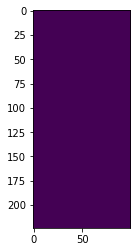

In [135]:
plt.imshow(np_arr[:, :100])

In [123]:
res = np.max(np_arr, axis=0) * np.arange(0, 224)
res[res > 0].min(), res.max()

(112.0, 174.0)

In [124]:
res = np.max(np_arr, axis=1) * np.arange(0, 224)
res[res > 0].min(), res.max()

(141.0, 194.0)

In [101]:
(feature_map0 > thres).shape

torch.Size([224, 224])

In [103]:
torch.argmax(feature_map0 > thres, dim=-1)

RuntimeError: "argmax_cpu" not implemented for 'Bool'

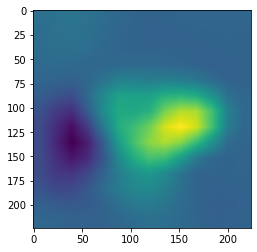

In [37]:
plt.imshow(feature_map1)

In [40]:
feature_map1.min(), feature_map1.max()

(tensor(-14.5817), tensor(29.7951))

In [54]:
feature_map0.min(), feature_map0.max()

(tensor(-18.9443), tensor(6.5551))

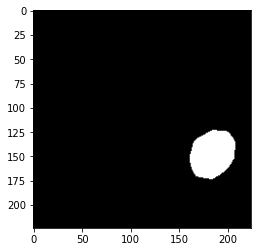

In [50]:
plt.imshow(feature_map0 > 10, cmap="gray")

In [49]:
feature_map0.min(), feature_map0.max()

(tensor(-14.3723), tensor(19.5883))

In [10]:
feature_maps = out[1]

In [11]:
map_ = feature_maps[0][0].cpu().detach().numpy()

In [12]:
map_.min(), map_.max()

(-15.452833, 5.518888)

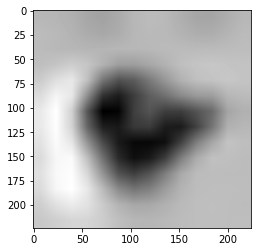

In [14]:
plt.imshow(map_, cmap="gray")

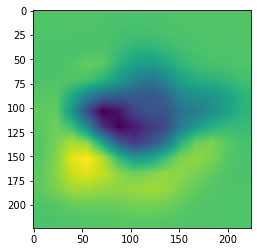

In [11]:
plt.imshow(map_)

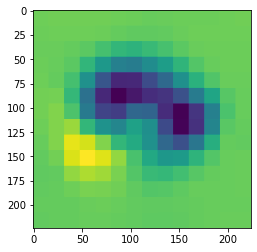

In [31]:
plt.imshow(map_)

In [20]:
inputs.shape

torch.Size([1, 3, 224, 224])

In [13]:
class_preds

tensor([1], device='cuda:0')

In [ ]:
def localize()